<a href="https://colab.research.google.com/github/sathvik-ujwal/Lab-Codes/blob/main/MACHINE%20LEARNING/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data = {
    "Infarc_Area": [
        0.119, 0.19, 0.395, 0.469, 0.13, 0.311, 0.418, 0.48, 0.687, 0.847,
        0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22, 0.299, 0.35, 0.35,
        0.588, 0.379, 0.149, 0.316, 0.39, 0.429, 0.477, 0.439, 0.446, 0.538,
        0.625, 0.974
    ],
    "Region_at_Risk": [
        0.34, 0.64, 0.76, 0.83, 0.73, 0.82, 0.95, 1.06, 1.2, 1.47,
        0.44, 0.77, 0.9, 1.07, 1.01, 1.03, 1.16, 1.21, 1.2, 1.22,
        0.99, 0.77, 1.05, 1.06, 1.02, 0.99, 0.97, 1.12, 1.23, 1.19,
        1.22, 1.4
    ],
    "Early_Cooling": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0
    ],
    "Late_Cooling": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1
    ]
}

df = pd.DataFrame(data)
df.head()

,Infarc_Area,Region_at_Risk,Early_Cooling,Late_Cooling
0,0.119,0.34,0,0
1,0.190,0.64,0,0
2,0.395,0.76,0,0
3,0.469,0.83,0,0
4,0.130,0.73,0,0


In [58]:
y = df['Infarc_Area']
x = df.drop(columns = ['Infarc_Area'])
y = y.to_numpy().reshape(1, -1)
x = x.to_numpy().reshape(3, -1)
n = len(x[0])
print(x.shape)
print(y.shape)
print(n)

(3, 32)
(1, 32)
32


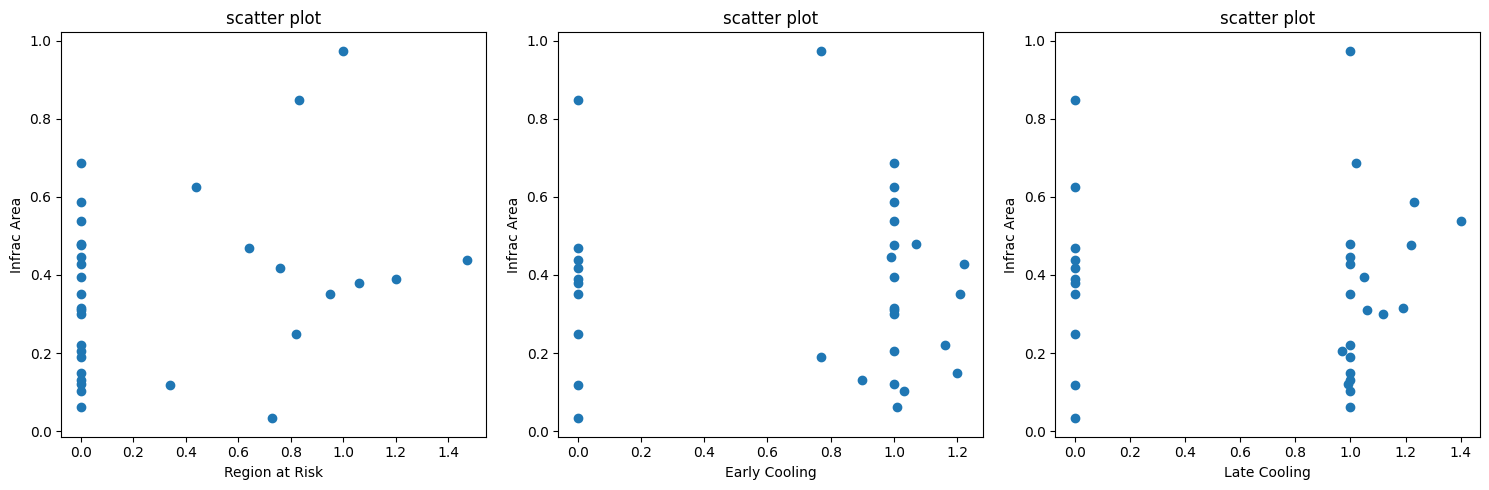

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
x_labels = ['Region at Risk', 'Early Cooling', 'Late Cooling']

for i in range(3):
    axes[i].scatter(x[i], y)
    axes[i].set_title("scatter plot")
    axes[i].set_xlabel(f"{x_labels[i]}")
    axes[i].set_ylabel('Infrac Area')

plt.tight_layout()
plt.show()

In [60]:
# Here we have 3 independent varibles so our equation for multiple linear regression is
# y = b0 + b1x1 + b2x2 + b3x3

matrix_x = np.array([
                   [n, np.sum(x[0]), np.sum(x[1]), np.sum(x[2])],
                   [np.sum(x[0]), np.sum(x[0]**2), np.sum(x[1]*x[0]), np.sum(x[2]*x[0])],
                   [np.sum(x[1]), np.sum(x[0]*x[1]), np.sum(x[1]**2), np.sum(x[2]*x[1])],
                   [np.sum(x[2]), np.sum(x[0]*x[2]), np.sum(x[1]*x[2]), np.sum(x[2]**2)]
                   ])
print(matrix_x)
matrix_y = np.array([np.sum(y), np.sum(x[0]*y), np.sum(x[1]*y), np.sum(x[2]*y)]).reshape(4,1)
print("--------------------------------------------------")
print(matrix_y)

matrix_b = np.dot(np.linalg.inv(matrix_x) , matrix_y)
print("--------------------------------------------------")
print(matrix_b)

#making predictions using the above coefficents
y_pred = matrix_b[0] + matrix_b[1]*x[0] + matrix_b[2]*x[1] + matrix_b[3]*x[2]
print("--------------------------------------------------")
print(y_pred)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, y_pred.reshape(1,32), squared = False)
print("--------------------------------------------------")
print(f"RMSE = {rmse}")

[[32.     10.24   22.33   22.25  ]
 [10.24    9.8176  1.21    1.    ]
 [22.33    1.21   22.9399 22.58  ]
 [22.25    1.     22.58   23.8193]]
--------------------------------------------------
[[11.789  ]
 [ 4.68615]
 [ 8.08098]
 [ 8.06705]]
--------------------------------------------------
[[-0.05254438]
 [ 0.48827058]
 [ 0.24157033]
 [ 0.13825905]]
--------------------------------------------------
[0.11346762 0.27172382 0.33419795 0.25994879 0.30312797 0.33558054
 0.31854127 0.34419492 0.33005018 0.35272021 0.3297007  0.32590241
 0.30389315 0.33453211 0.32313723 0.3478375  0.36593626 0.34387609
 0.41131268 0.37801477 0.35908458 0.46502244 0.37559907 0.35355422
 0.53338032 0.38043048 0.35770199 0.66521338 0.3248693  0.38258862
 0.40386501 0.75999441]
--------------------------------------------------
RMSE = 0.1543965415160382


In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.T, y.T)

print("--------------------------------------------------")
print(f"Coefficients: {model.coef_}")
print("--------------------------------------------------")
print(f"Intercept: {model.intercept_}")
print("--------------------------------------------------")

pred = model.predict(x.T)
print(pred)
print("--------------------------------------------------")
rmse = mean_squared_error(y.T, pred, squared = False)
print(f"RMSE = {rmse}")

--------------------------------------------------
Coefficients: [[0.48827058 0.24157033 0.13825905]]
--------------------------------------------------
Intercept: [-0.05254438]
--------------------------------------------------
[[0.11346762]
 [0.27172382]
 [0.33419795]
 [0.25994879]
 [0.30312797]
 [0.33558054]
 [0.31854127]
 [0.34419492]
 [0.33005018]
 [0.35272021]
 [0.3297007 ]
 [0.32590241]
 [0.30389315]
 [0.33453211]
 [0.32313723]
 [0.3478375 ]
 [0.36593626]
 [0.34387609]
 [0.41131268]
 [0.37801477]
 [0.35908458]
 [0.46502244]
 [0.37559907]
 [0.35355422]
 [0.53338032]
 [0.38043048]
 [0.35770199]
 [0.66521338]
 [0.3248693 ]
 [0.38258862]
 [0.40386501]
 [0.75999441]]
--------------------------------------------------
RMSE = 0.1863457644349441


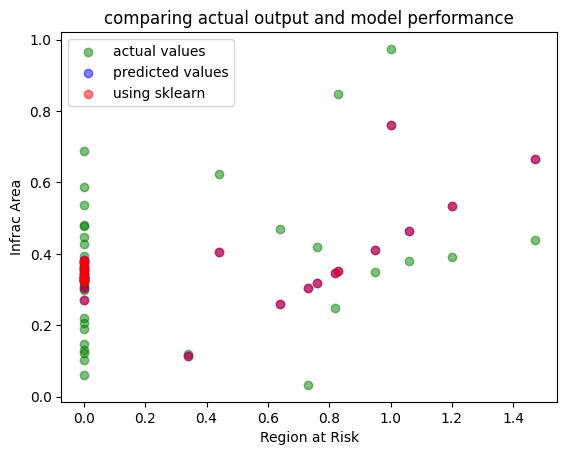

In [70]:
plt.scatter(x[0], y, color="green", label="actual values", alpha = 0.5)
plt.scatter(x[0], y_pred, color="blue", label="predicted values", alpha = 0.5)
plt.scatter(x[0], pred, color="red", label="using sklearn", alpha = 0.5)
plt.title("comparing actual output and model performance")
plt.xlabel("Region at Risk")
plt.ylabel("Infrac Area")
plt.legend()
plt.show()